<!-- <img src="./logo_UTN.svg" align="right" width="150" />  -->
<img src="Logo_UNSAM.png" align="right" width="150" />  -->
#### Análisis y Procesamiento Digital de Señales

# Tarea Semanal N°03
#### Montserrat Coto



## Introducción

En este trabajo se realizará el análisis espectral de tres señales reales: una señal de electrocardiograma (ECG), una señal de pletismografía (PPG) y una señal de audio correspondiente a la voz del docente. Todas ellas fueron previamente digitalizadas y se encuentran disponibles en el repositorio provisto por la cátedra.

El objetivo principal es estimar la densidad espectral de potencia (PSD) de cada señal. Para ello se empleó el método de Welch, utilizando ventana de Hann y normalización al pico, lo cual permite comparar visualmente los espectros incluso entre señales de distinta naturaleza y niveles de ruido. A partir de esta estimación, se cuantificó el ancho de banda efectivo, definido como la frecuencia máxima que acumula un determinado porcentaje de la energía espectral total (en este caso, 95% y 98%).

La señal PPG, al presentar componentes de ruido características —como interferencia de red eléctrica (armónicos de 50 Hz) y contenido de alta frecuencia no fisiológico—, fue preprocesada mediante un filtro pasa banda Butterworth de cuarto orden, con frecuencias de corte en 0.3 Hz y 10 Hz, preservando así la información relevante asociada a la frecuencia cardíaca en reposo. Para el cálculo del ancho de banda, se aplicó una normalización a potencia unitaria sobre todas las señales, y se utilizó la FFT unilateral (rFFT) para analizar la distribución espectral acumulada.

Finalmente, se presenta una tabla comparativa con los anchos de banda estimados para cada señal, lo que permite analizar y contrastar el comportamiento espectral de fenómenos de naturaleza biomédica (ECG y PPG) y acústica (voz).

# Desarollo

## A. Estimación de la densidad espectral de potencia (PSD)

##### Definición de Parámetros

In [1]:
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

from scipy import signal
from scipy.fft import fft, fftshift

def vertical_flaten(a): #Llevan vectores planos  a columnas

    return a.reshape(a.shape[0],1)

### Estimación de la densidad espectral de potencia (PSD) - ECG 

ValueError: x and y must have same first dimension, but have shapes (129,) and (1,)

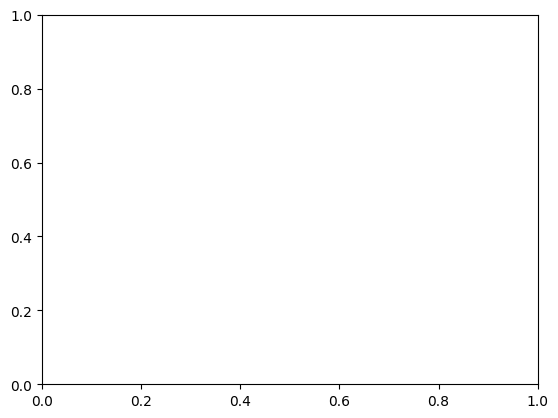

In [2]:
fs_ecg = 1000 # Hz

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])

N = len(ecg_one_lead)
nperseg= N/6
df_ECG=fs_ecg/N

#Método de Welch: welch(x, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
ecg_welch_f, ecg_Pxx=signal.welch(x=ecg_one_lead, fs=fs_ecg, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=0, average='mean')


ecg_Pxx_db=10*np.log10(2*np.abs(ecg_Pxx**2))
ecg_Pxx_db=np.max(ecg_Pxx_db) #Normalización por el pico máx

plt.figure(1)
ff=np.linspace(0, (N-1)*df_ECG, N)
bfrec= ff <= fs_ecg/2
plt.plot(ecg_welch_f, ecg_Pxx_db, label='ECG (Welch)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/[Hz]')
plt.xlim(0,fs_ecg/2) #Me lo lleva a Nyquis
plt.show()

In [3]:
#Experimento: 
# Grilla de sampleo temporal

tt = np.linspace(0, (N-1)*ts, N)  # Vector de tiempos
argg = 2*np.pi*f0*tt # Argumento para la función senoidal


xx = np.sqrt(2)*np.sin(argg)  # Señal senoidal
varianza = np.var(xx) # Cálculo de la varianza de la señal

analog_sig = xx/np.sqrt(varianza) # señal analógica normalizada (para que su potencia sea 1 W) sin ruido
nn = np.random.normal(0, np.sqrt(pot_ruido_analog), N)  # Ruido gaussiano
sr = analog_sig + nn # Señal analógica de entrada al ADC (con ruido analógico)
srq = np.round(sr/q)*q # Señal cuantizada

nq = srq - sr # Ruido de cuantización



## Señal temporal

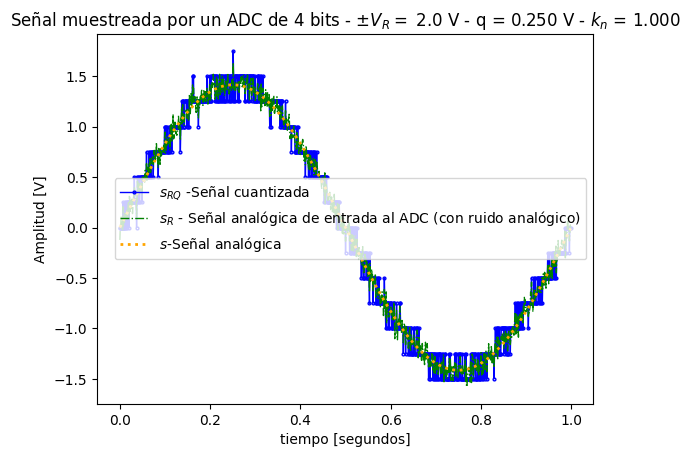

In [4]:
# Señal temporal
plt.figure(1)
plt.plot(tt, srq, lw=1, ls='solid', color='blue', marker='o', markersize=2,markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='$s_{RQ}$ -Señal cuantizada')
plt.plot(tt, sr, lw=1, ls='dashdot', color='green', label='$s_{R}$ - Señal analógica de entrada al ADC (con ruido analógico)')
plt.plot(tt, analog_sig, lw=2, color='orange', ls='dotted', label='$s$-Señal analógica')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V - $k_n$ = {:3.3f}'.format(B, Vf, q, kn))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()



### Analisis de la señal temporal
A simple vista al comparar mi gráfico con el proporcionado de ejemplo en el enunciado de la tarea, se pueden notar algunas diferencias importantes; En mi caso, la señal cuantizada parece tener un mayor peso visual, lo que podría deberse a varios factores: la cantidad de muestras tomadas, el grosor de las líneas utilizadas para trazar cada curva o el estilo de marcador aplicado. Esto hace que mi señal luzca más cargada visualmente.


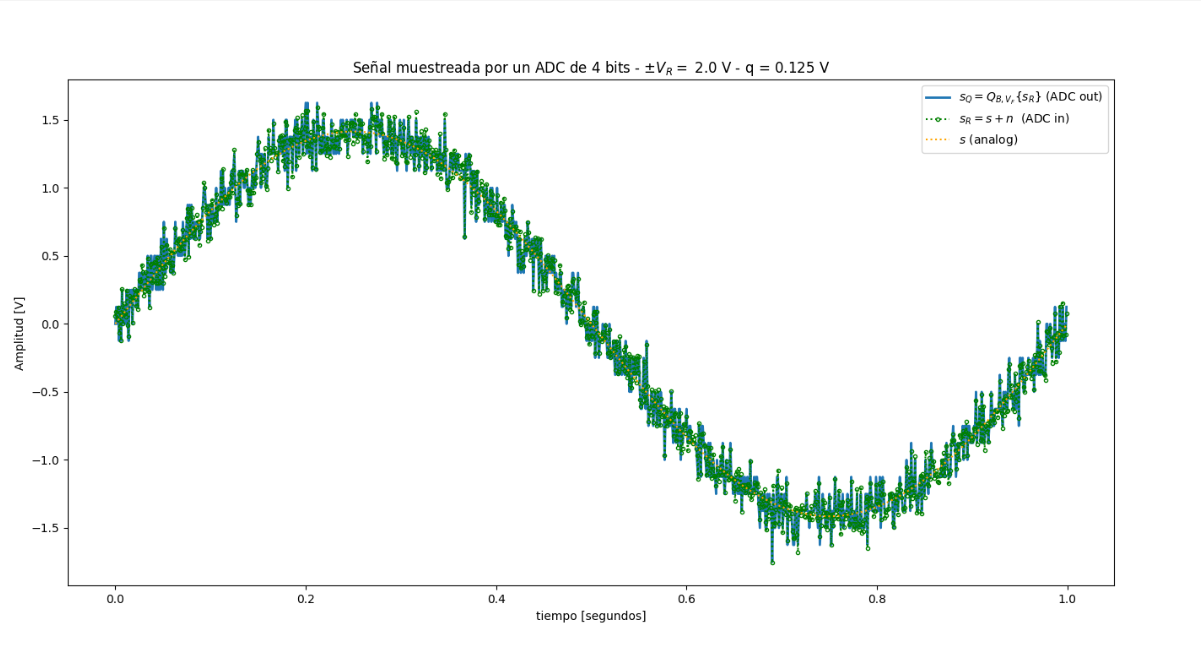

In [5]:
from IPython.display import Image
Image("Señal_temporal_(Enunciado).PNG", width=500, height=300)

Otra diferencia a tener encuenta es el valor del paso de cuantificación $q$. En mi gráfico, $q = 0{,}25$ V, mientras que en la del docente es de $q = 0{,}125$ V. Sin embargo, si validamos el cálculo de $q$ para un ADC de 4 bits con un voltaje de referencia de $\pm V_R = \pm 2$ V, obtenemos:

$$q = \frac{2 \cdot V_R}{2^B} = \frac{4}{16} = 0.25 \, \text{V}$$


Esto indicaria que mi valor de $q$ es correcto bajo estas condiciones, el valor de $q$ en el gráfico aportado por la cátedra correspondería al de $q/2$
 
Si bien mi gráfico se ve más denso, ambas señales mantienen el mismo rango de amplitud, aproximadamente $\pm 1{,}5$ V, y ambas señales tienen un comportamiento similar a nivel general.

## Espectro

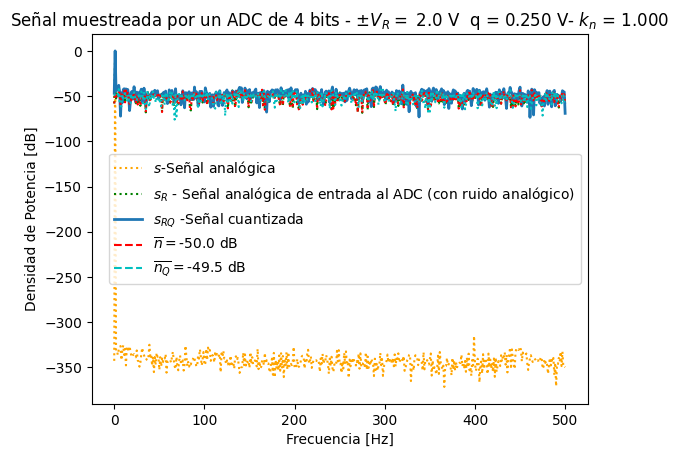

In [6]:
# Espectro
plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr) #Vector de N muestras, num. complejos
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)

# # grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

#Los espectros los consigo quedandome con la mitad del vector del np.fft.fft porque son redundantes
#por la símetria de la fft, o me quedo con el módulo o me quedo con la fase

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$s$-Señal analógica')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$s_{R}$ - Señal analógica de entrada al ADC (con ruido analógico)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$s_{RQ}$ -Señal cuantizada' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V  q = {:3.3f} V- $k_n$ = {:3.3f}'.format(B, Vf, q, kn))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()


### Espectro sin tener en cuenta el aporte de s


(-80.0, 0.0)

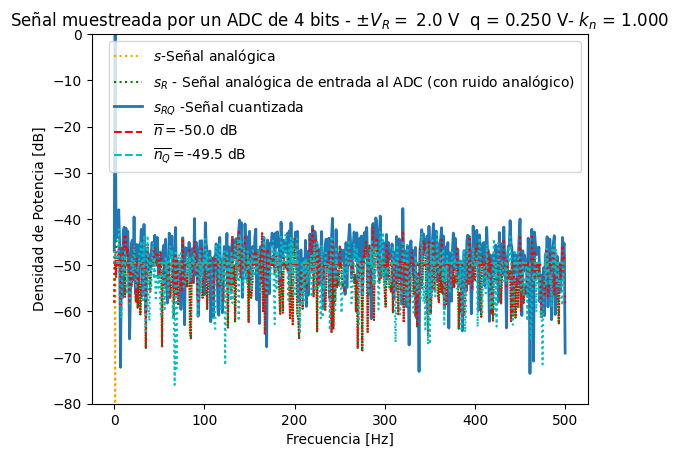

In [7]:
plt.figure(3)
ft_SR = 1/N*np.fft.fft( sr) #Vector de N muestras, num. complejos
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)

# # grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$s$-Señal analógica')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$s_{R}$ - Señal analógica de entrada al ADC (con ruido analógico)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$s_{RQ}$ -Señal cuantizada' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V  q = {:3.3f} V- $k_n$ = {:3.3f}'.format(B, Vf, q, kn))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.ylim(-80, 0)  # Límite del eje Y

### Análisis del espectro

En cuanto al análisis espectral, se observa que en mi gráfico el piso de ruido de la señal analógica $s$ está aproximadamente en $-350 dB$, lo cual representa un valor extremadamente bajo. Este niveld e ruido analógico es tan limpio que hace que su aporte sea prácticamente despreciable frente al ruido introducido por la cuantificación. Por este motivo, podría interpretarse que el docente decidió no representarlo en su gráfico, que traigo a continuación:



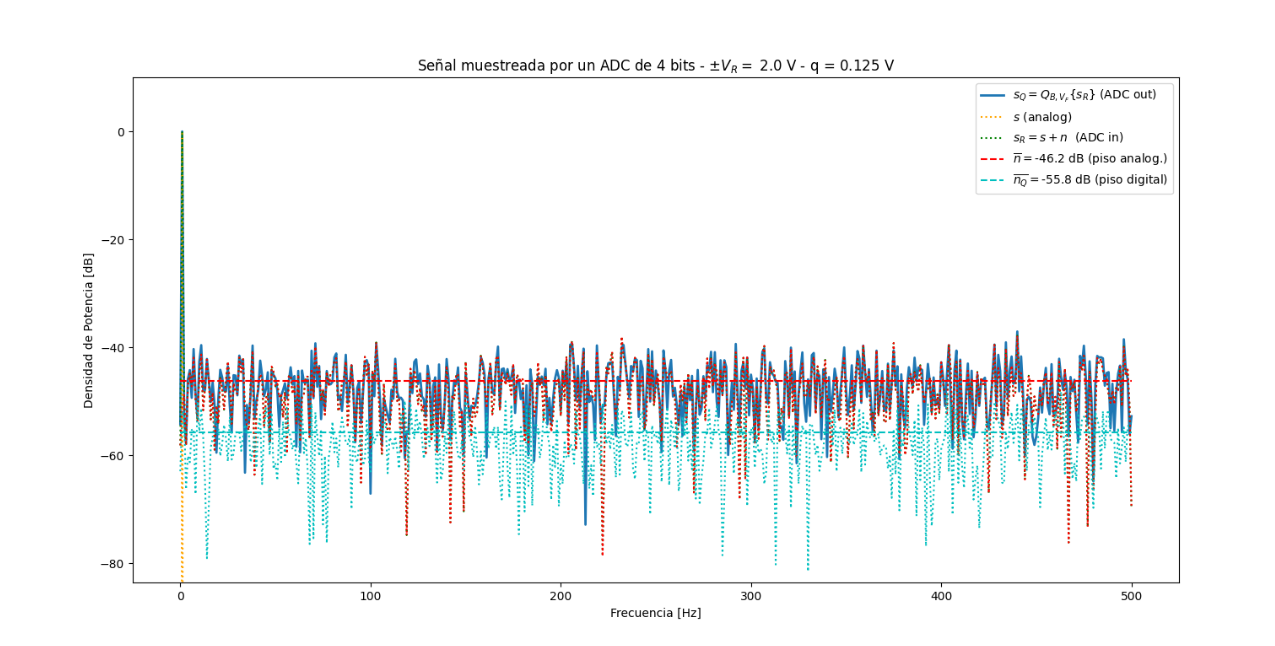

In [8]:
from IPython.display import Image
Image("Espectro(Enunciado).PNG", width=500, height=300)

Además, en mi caso el nivel de potencia del ruido analógico $\tilde{n}$ y del ruido de cuantificación $\tilde{n}q$ resultaron prácticamente iguales, con valores de -49.7dB y -49.8dB respectivamente. Esto indica que ambos tipos de ruido tienen un aporte muy similar en la señal total.

En cambio, en el gráfico del docente se observa que el ruido de cuantificación se ubica aproximadamente 10 dB por debajo del ruido analógico. En ese caso, el aporte del ruido generado por la electrónica analógica es ligeramente mayor que el introducido por el proceso de cuantificación, lo cual reduce el peso relativo del ruido digital en el espectro total.

Esta diferencia también puede estar asociada al paso de cuantificación: en mi caso $q = 0.25 V$, mientras que en el gráfico del docente $q = 0.125 V$. Un menor valor de q implica una resolución más alta del ADC, y por ende, un menor error de cuantificación, lo cual podría explicar por qué en el gráfico del docente el ruido digital se encuentra por debajo.

### Histograma

Text(0.5, 0, 'Pasos de cuantización (q) [V]')

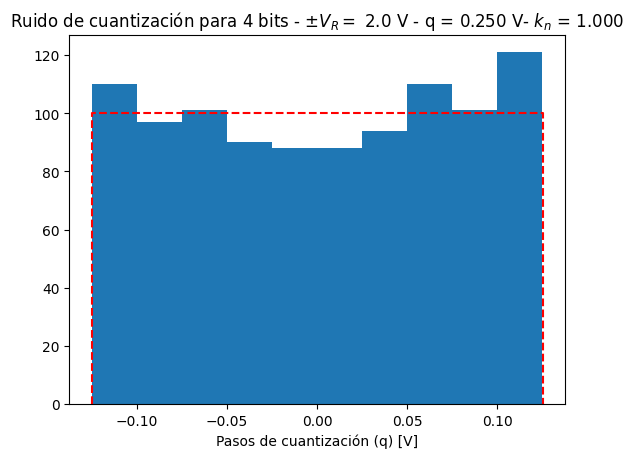

In [9]:
plt.figure(3)
bins = 10
plt.hist(nq.flatten(), bins=bins)
#plt.hist(nqf.flatten()/(q/2), bins=2*bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
#plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N*R/bins, N*R/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V- $k_n$ = {:3.3f}'.format(B, Vf, q, kn))

plt.xlabel('Pasos de cuantización (q) [V]')

### Análisis del histograma

Al comparar mi histograma con el del enunciado, se pueden ver diferencias tanto en el rango de los pasos de cuantificación como en la forma general del gráfico. Adjunto la imagen de referencia del enunciado:


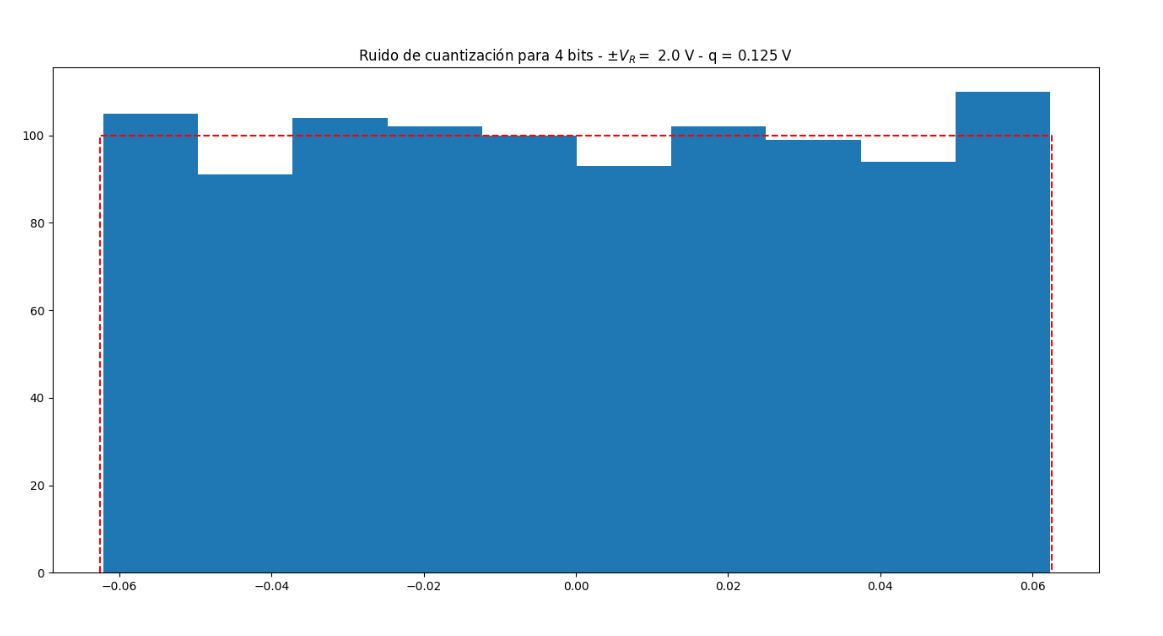

In [10]:
from IPython.display import Image
Image("Histograma(Enunciado).PNG", width=500, height=300)

La diferencia principal se debe al valor del paso de cuantificación $q$. En mi caso, $q = 0{,}25 V$, por lo que el ruido de cuantificación $n_q$ debería estar contenido en el intervalo $[-q/2, q/2] = [-0{,}125, 0{,}125]$. En cambio, en el gráfico del docente, $q = 0{,}125 V$, por lo que el rango esperado del ruido es más estrecho: $[-0{,}0625, 0{,}0625]$. Esta diferencia en el valor de $q$ explica por qué los histogramas tienen distintos rangos de valores.

Al realizar la experiencia, inicialmente tuve un error al momento de graficar: el rango utilizado no correspondía al intervalo $[-q/2, q/2]$, sino que se había definido como [-1/2, -1/2, 1/2, 1/2], lo cual no tenía sentido en el contexto del ruido de cuantificación. Detecté este problema al notar que el rango de mi histograma no se correspondía con el valor de $q$ calculado, y corregí el código en consecuencia.

Por otro lado, la forma de las barras del histograma también están relacionadas con el valor de $q$. Esto se debe a que los histogramas se construyen dividiendo el rango total en intervalos o "bins". En mi caso utilicé bins = 10, lo cual implica dividir el intervalo $[-q/2, q/2]$ en 10 partes iguales. Dado que el valor de $q$ varía entre los gráficos, los intervalos, y por lo tanto las distribuciones de muestras, también difieren. Esto justifica las diferencias observadas en la forma general del histograma.


## 2.Analizar para una de las siguientes configuraciones B = ̣{4, 8 y 16} bits, kn={1/10,1,10} y discutir los resultados respecto a lo obtenido en a)

### 2. 1 Variación de bits

Para esta parte de la consigna, opté por mantener constante el valor de $K_n=1$ y centrar el análisis en cómo varía el comportamiento del sistema al aumentar la cantidad de bits. Seleccioné los valores de 4, 8 y 16 bits, y a continuación presento los gráficos correspondientes a los espectros y a los histogramas del ruido de cuantización para cada caso.
No incluyo el código utilizado, ya que es el mismo empleado en el análisis anterior, con la única diferencia de que se modifica el valor asignado a la variable de cantidad de bits.



### 2.1.1 Espectros

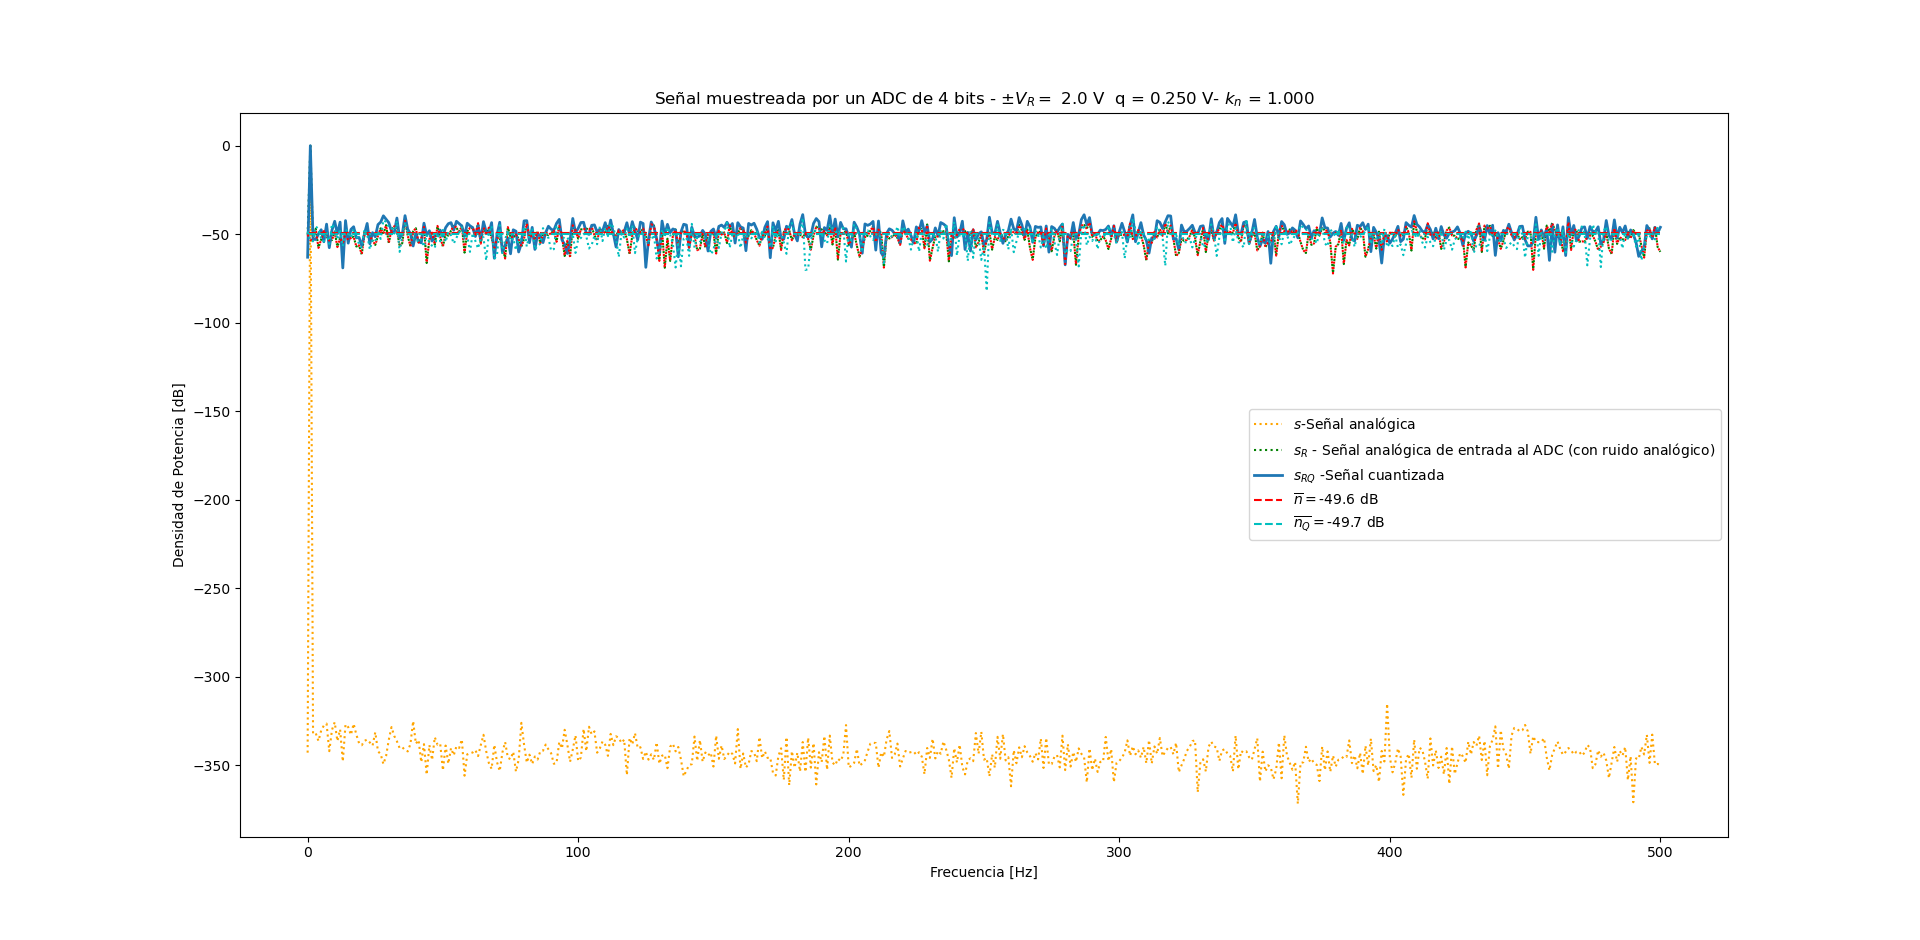

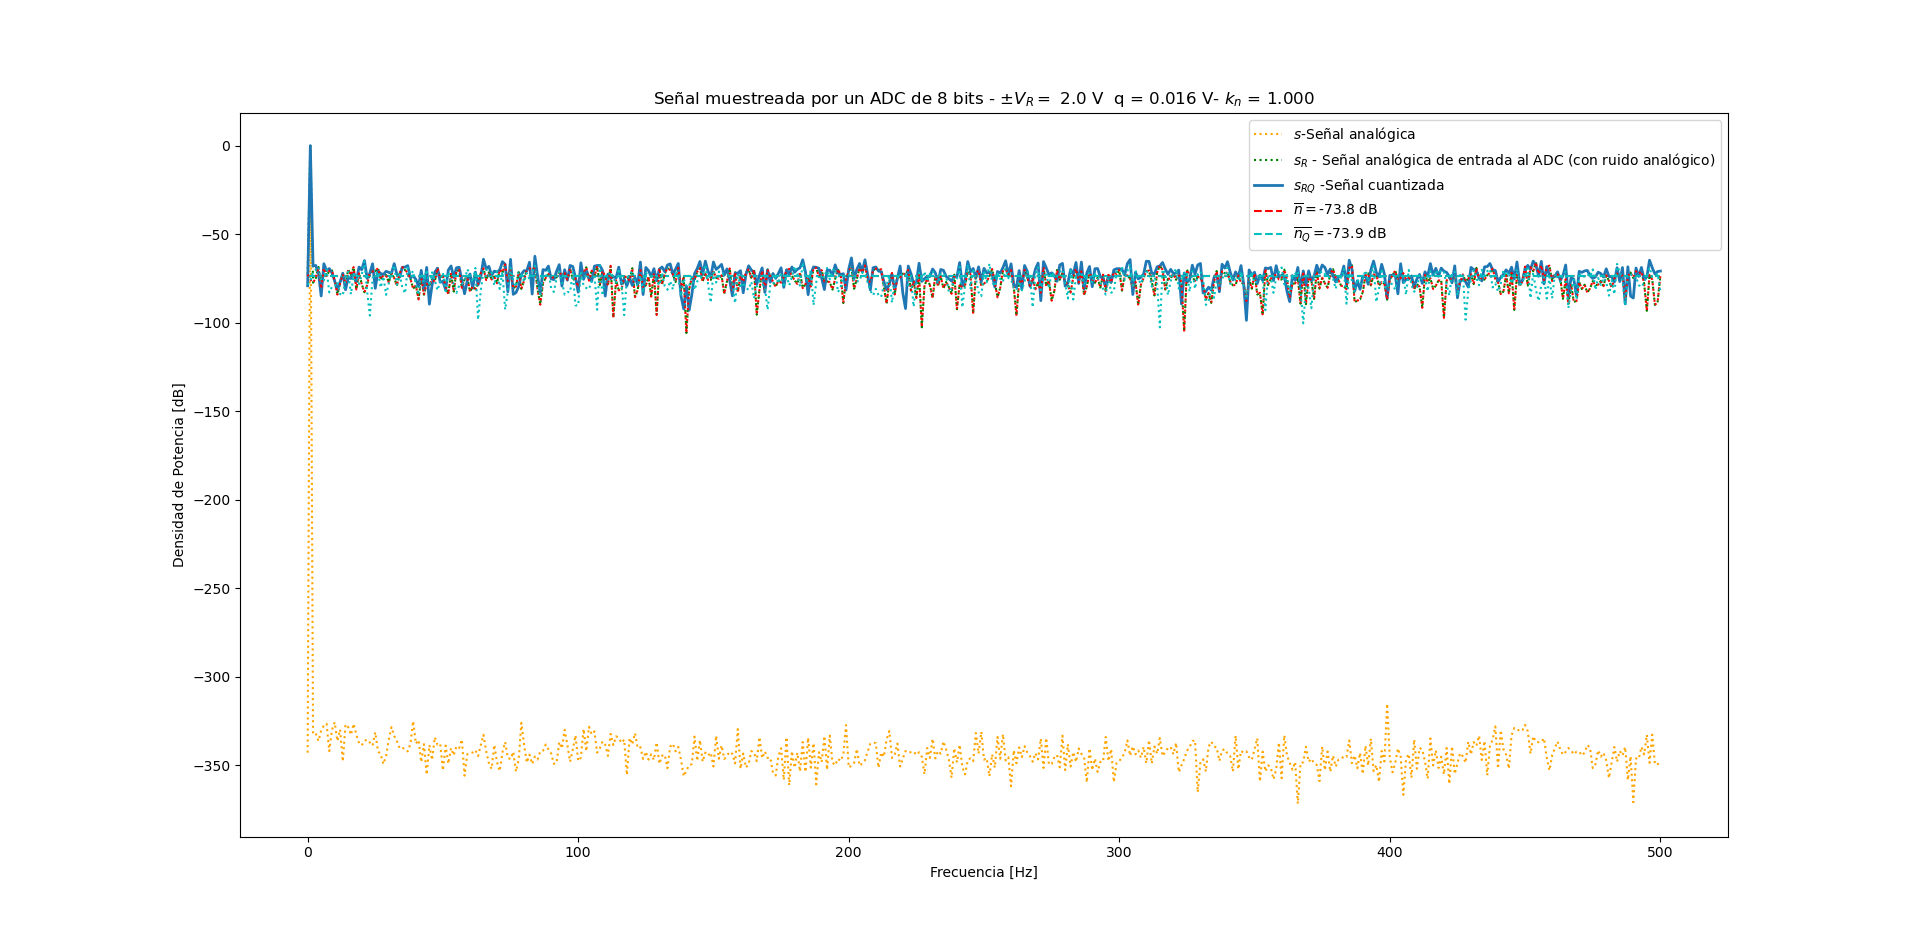

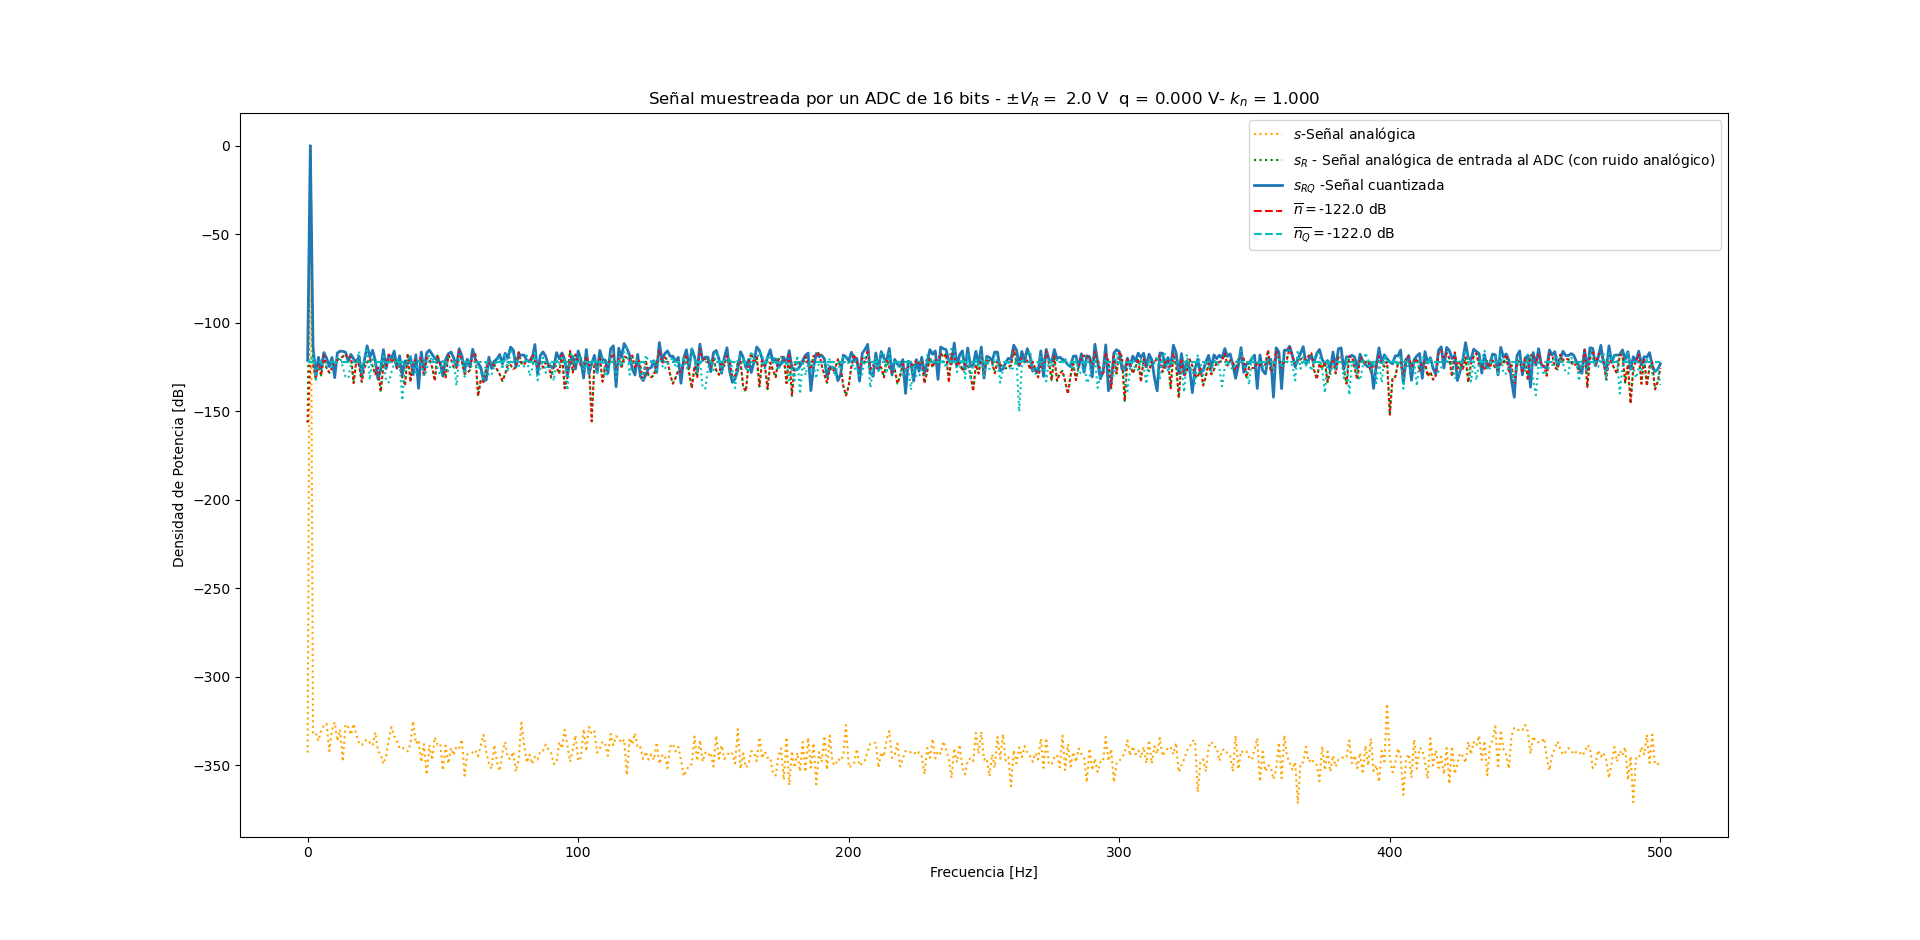

In [11]:
from IPython.display import Image, display

display(Image("Señal_Muestrada_ADC_4Bits.png", width=1000))
display(Image("Señal_Muestrada_ADC_8Bits.png", width=1000))
display(Image("Señal_Muestrada_ADC_16Bits.png", width=1000))


### Datos observados

| Bits (B) | $\overline{n}$ (dB) | $\overline{n_Q}$ (dB) | Señal analógica con ruido | Señal cuantizada ($s_{RQ}$) |
|----------|---------------------|------------------------|-----------------------------|-------------------------------|
| 4        | -50,1 dB            | -49,6 dB               | ~ -350 dB (ruido prácticamente despreciable) | Presenta un pico en 0 dB seguido de una caída hasta ~-50 dB |
| 8        | -73,9 dB            | -74,1 dB               | ~ -350 dB                  | Pico en 0 dB y caída hasta ~-122 dB |
| 16       | -122 dB             | -122,2 dB              | ~ -350 dB                  | Pico en 0 dB con caída hasta ~-75 dB |



### Analísis

Los gráficos del espectro evidencian la relación directa entre la cantidad de bits utilizados en la cuantización y el nivel del piso de ruido. A medida que se incrementa la cantidad de bits, el paso de cuantificación $q$ disminuye según la expresión $$q = \frac{2V_R}{2^B}$$ 

Al ser más pequeño el valor de $q$, el error introducido por la cuantización se reduce, lo que implica un menor nivel de ruido digital.

En este experimento, la constante $K_n = 1$ se mantuvo fija para asegurar que las comparaciones se basaran únicamente en la variación de $B$; Esta constante actúa como un factor de proporcionalidad entre el ruido analógico y el ruido digital. Dado que el ruido de cuantización depende directamente del tamaño de $q$, se observa una disminución progresiva del piso de ruido en el espectro al pasar de 4 a 8 y luego a 16 bits.

La señal original (sin cuantizar) presenta una potencia prácticamente constante en torno a los -350 dB, se mantiene constante porque la diferencia entre señales es de como mínimo 16 ordenees. En contraste, las señales cuantizadas presentan un nivel espectral más elevado, producto del ruido introducido por el proceso de cuantización. 


### 2.1.1 Histograma

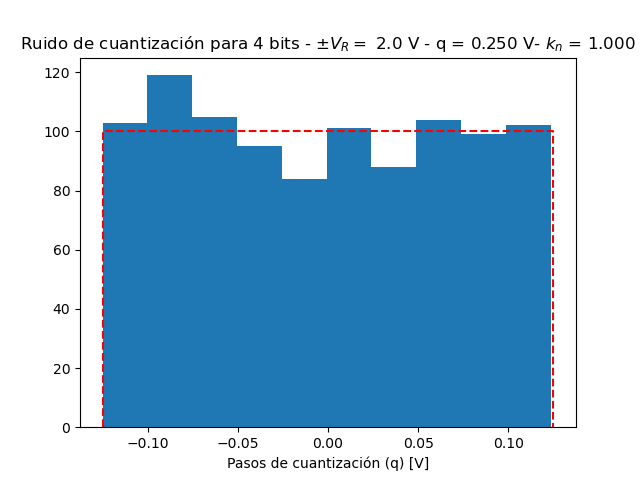

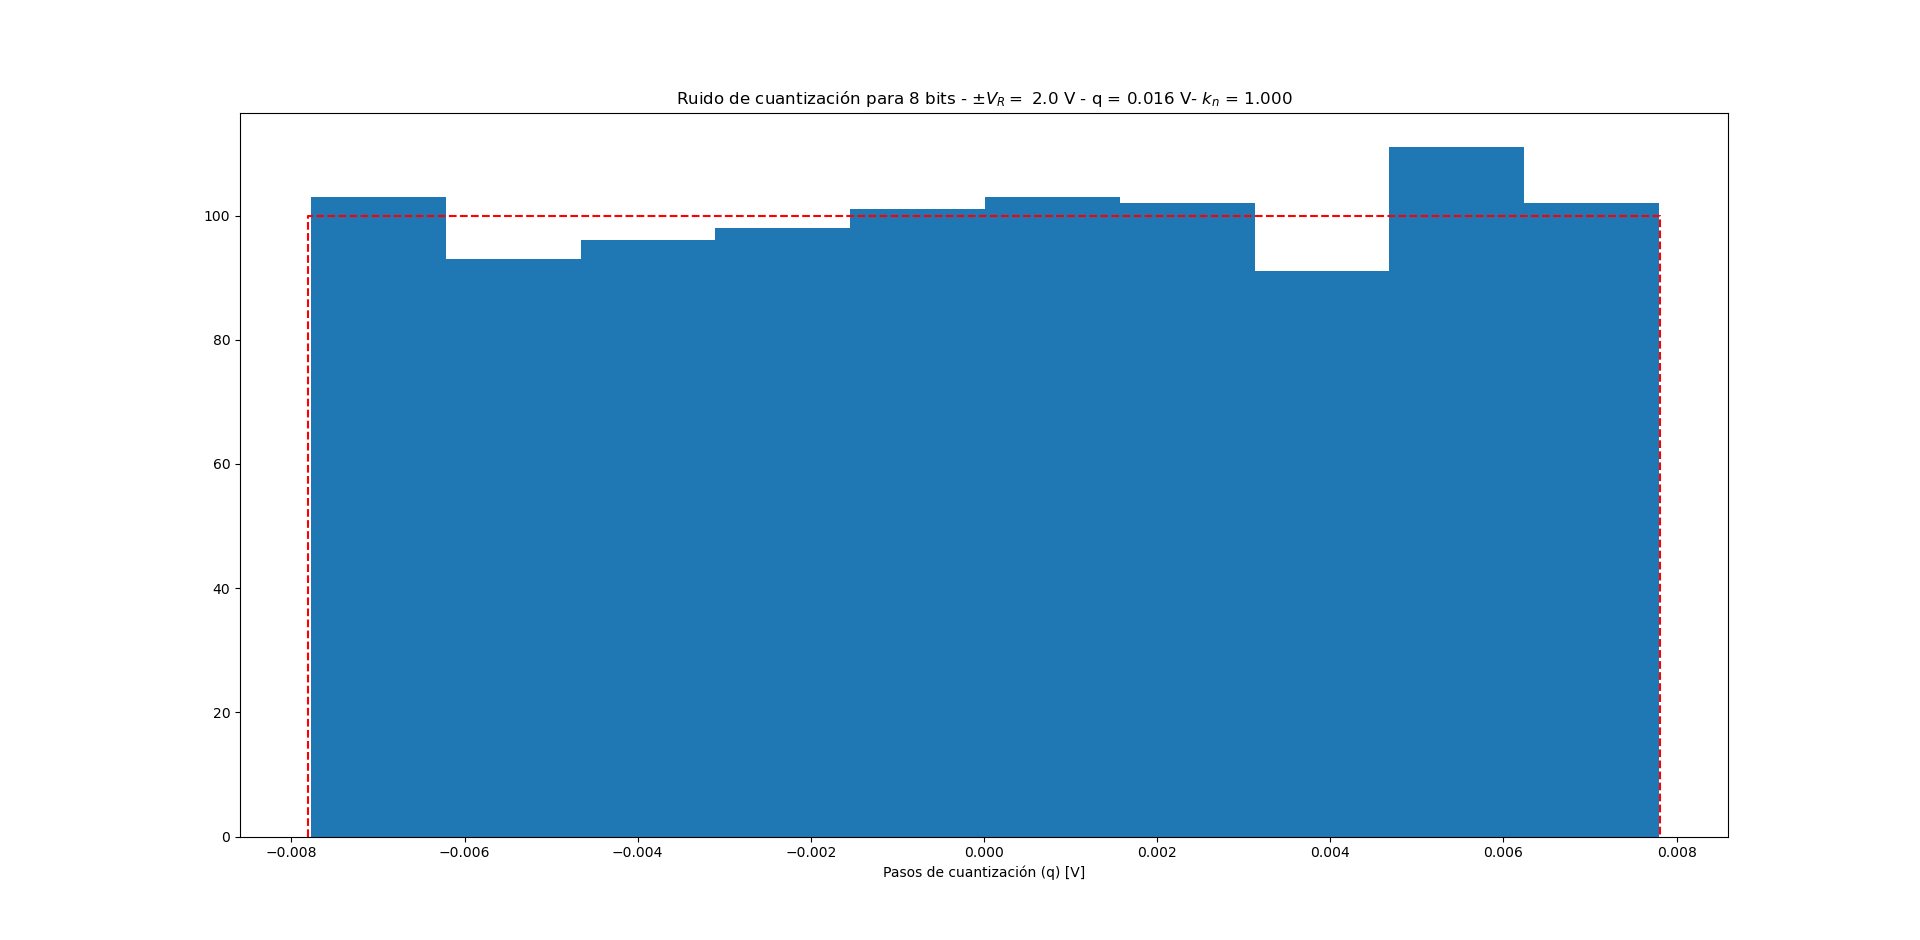

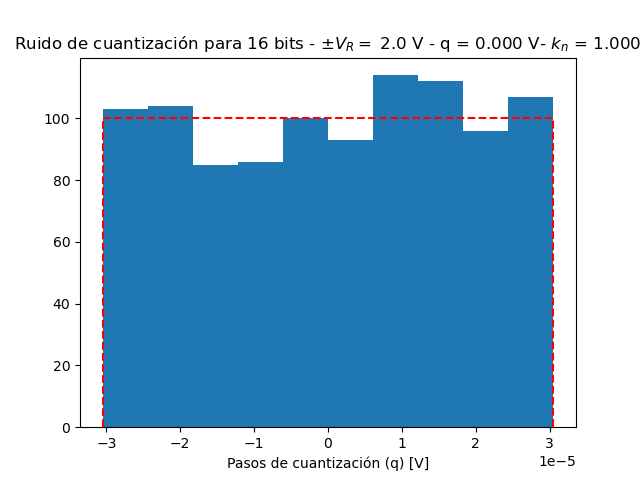

In [12]:
from IPython.display import Image, display

display(Image("Ruido_De_Cuantificacion_4bits.png", width=1000))
display(Image("Ruido_De_Cuantificacion_8bits.png", width=1000))
display(Image("Ruido_De_Cuantificacion_16bits.png", width=1000))

### Analísis

Los histogramas muestran la distribución del ruido de cuantización $n_q$ respecto al ruido total $n$. En este análisis, se mantuvo fija la cantidad de bins en 10 para todos los casos, lo que implica que cada histograma divide el intervalo total del ruido de cuantización $q$ en 10 subintervalos. Como ya se a comentado durante todo el trabajo, $q$ depende inversamente de la cantidad de bits, cada aumento en B reduce significativamente el tamaño del paso de cuantificación.

Para $B = 4$ bits, el paso de cuantificación es relativamente grande $q = 0{,}25 V$, y el histograma presenta una distribución uniforme. Esto es esperable, ya que el error de cuantización tiende a distribuirse uniformemente cuando el ruido analógico es despreciable frente al digital.

En el caso de $B = 8$ bits, $q$ se reduce a aproximadamente $0{,}016 V$. Al disminuir el paso, se incrementa la resolución del sistema. Dado que $n_q$ es una secuencia aleatoria, al achicar el intervalo también se reduce la probabilidad de errores significativos.

Finalmente, para $B = 16$ bits, $q$ es tan pequeño (del orden de $10^{-5} V$ que el error introducido por la cuantización es prácticamente despreciable. En este caso, el ruido analógico pasa a ser el factor predominante, ya que el sistema digital deja de ser la fuente principal de distorsión. Aunque los histogramas puedan parecer visualmente similares en cuanto a su ancho, esto se debe a la escala fija de la gráfica; en realidad, los niveles se encuentran mucho más concentrados en torno al cero.



### 2. 2 Variación de Kn

Para analizar el comportamiento del sistema en función de las variaciones de $K_n=1$, decidí dejar fija la resolución del ADC en 8 bits. Esto se debe a que, con 4 bits, el nivel de ruido de cuantización es tan alto que domina completamente el comportamiento del sistema, ocultando el efecto del ruido analógico. 

Caso contrario, con 16 bits, el paso de cuantificación es tan pequeño que el ruido digital se vuelve prácticamente despreciable; por lo tanto, incluso al modificar $K_n=1$, sobretodo con los valores  1, 1/10 o 10, el aporte en el espectro no se apreciaría con claridad. 

A mi parecer, 8 bits es un valor intermedio; el ruido de cuantización aún es relevante, pero permite observar cómo varía el sistema cuando se modifica la relación entre el ruido analógico y digital.

De igual manera que para el analísis de los bits, no sumo el código porque es el mismo que ya se encuentra en el documento; solamente varie el valor de kn y guarde las imagenes de los ploteos para mostrarlas a continuación:


### 2.2.1 Espectros

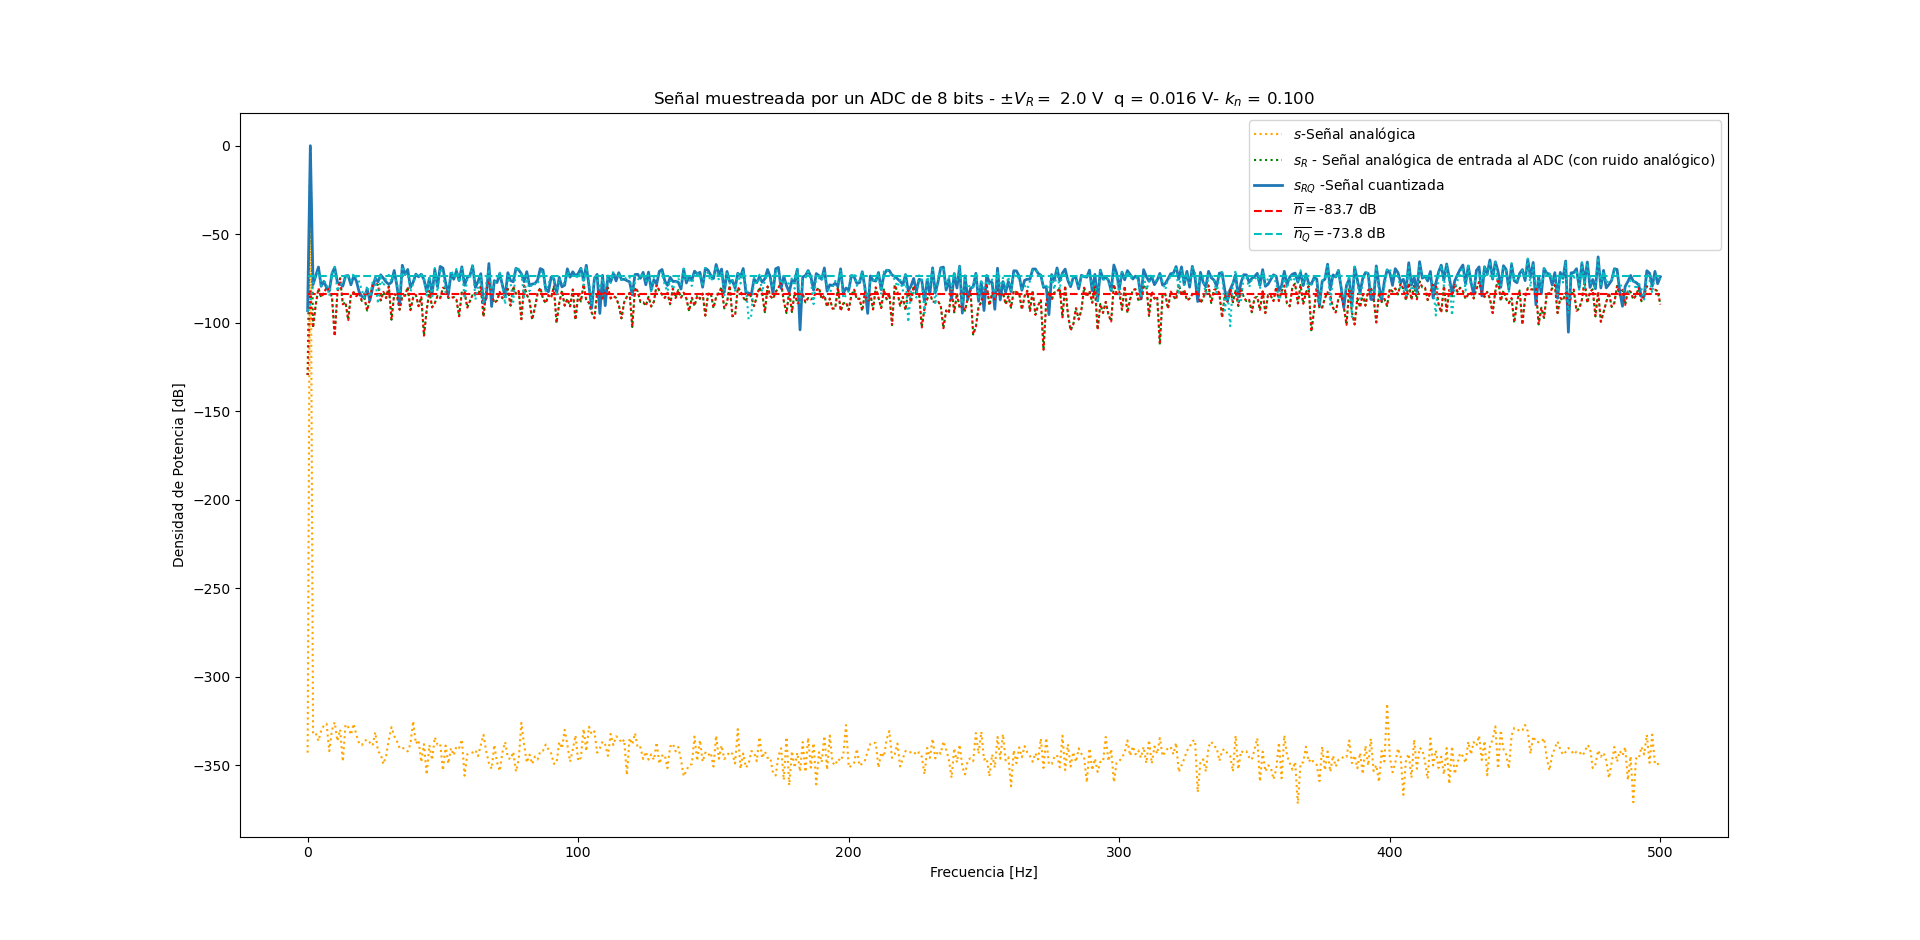

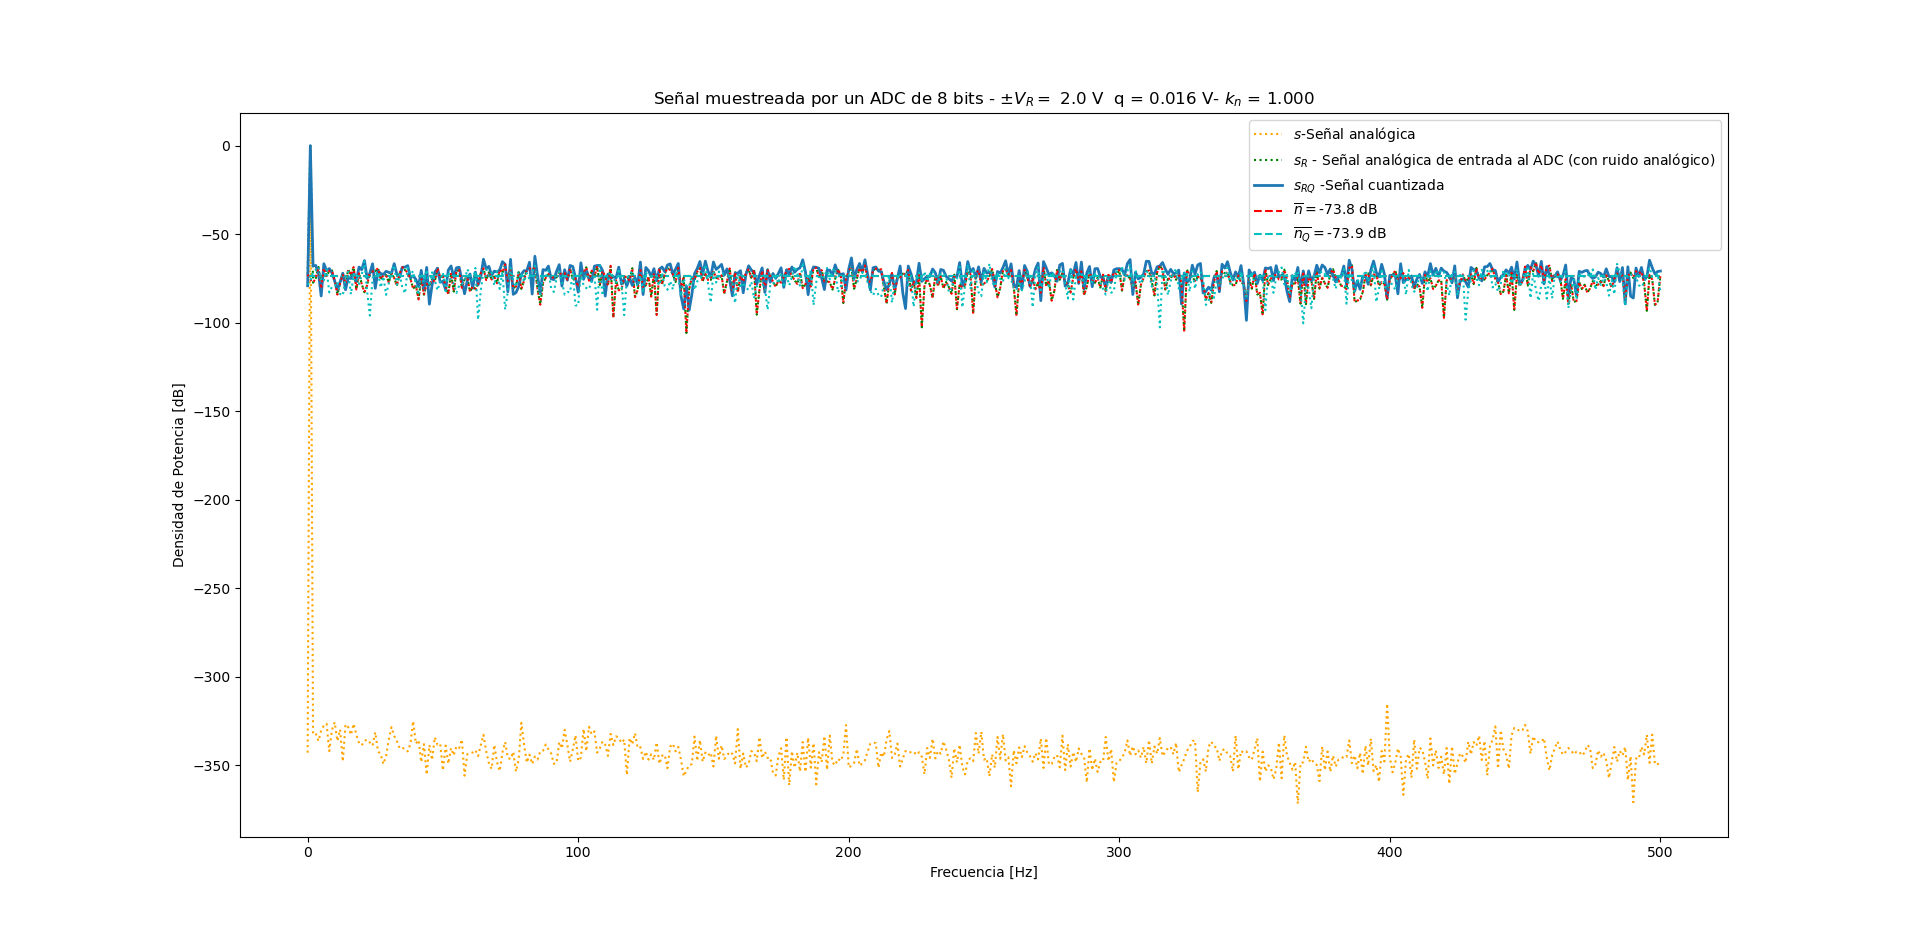

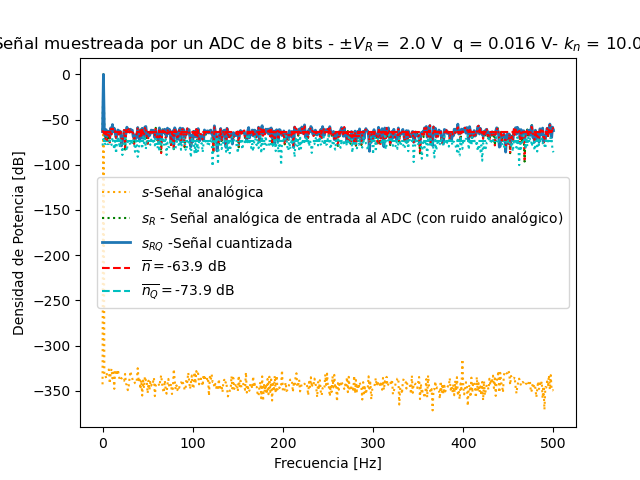

In [13]:
from IPython.display import Image, display

display(Image("Señal_Muestrada_ADC_kn.png", width=1000))
display(Image("Señal_Muestrada_ADC_8Bits.png", width=1000))
display(Image("Señal_Muestrada_ADC_10kn.png", width=1000))

| $K_n$ | $\overline{n}$ (dB) | $\overline{n_Q}$ (dB) | Señal analógica con ruido | Señal cuantizada ($s_{RQ}$) |
|----------|---------------------|------------------------|-----------------------------|-------------------------------|
| 0.1        | -83,8 dB            | --73,7 dB               | ~ -350 dB (ruido prácticamente despreciable) | Presenta un pico en 0 dB seguido de una caída hasta ~-75 dB |
| 1        | -73,9 dB            | -74,1 dB               | ~ -350 dB                  | Pico en 0 dB y caída hasta ~-122 dB |
|10       | --64,2 dB             | -73,9 dB              | ~ -350 dB                  | Pico en 0 dB con caída hasta ~-65 dB |




### Analísis

Para $k_n=0,1$, el ruido analógico es  menor que el digital. Esto se nota en el espectro: la señal cuantificada tiene un pico inicial en 0dB y luego cae hasta estabilizarse cerca de los −75dB, lo que muestra que el componente que más influye es el digital. 

En el caso de $K_n=1$, los dos tipos de ruido están bastante equilibrados, el piso espectral de la señal cuantificada llega a unos −122dB, lo que indica que no hay una predominancia clara entre el ruido de cuantización y el analógico.

Por último, con $K_n=10$, el ruido analógico empieza a ganar protagonismo, aunque el ruido digital sigue siendo el mismo, el piso espectral sube hasta −65dB. Esto muestra que la electrónica analógica empieza a desmejorar la calidad general del sistema, eso se debe a que aunque tengamos una buena resolución por cantidad de bits, el limitante pasa a ser la parte analógica

### 2.2.2 Histograma

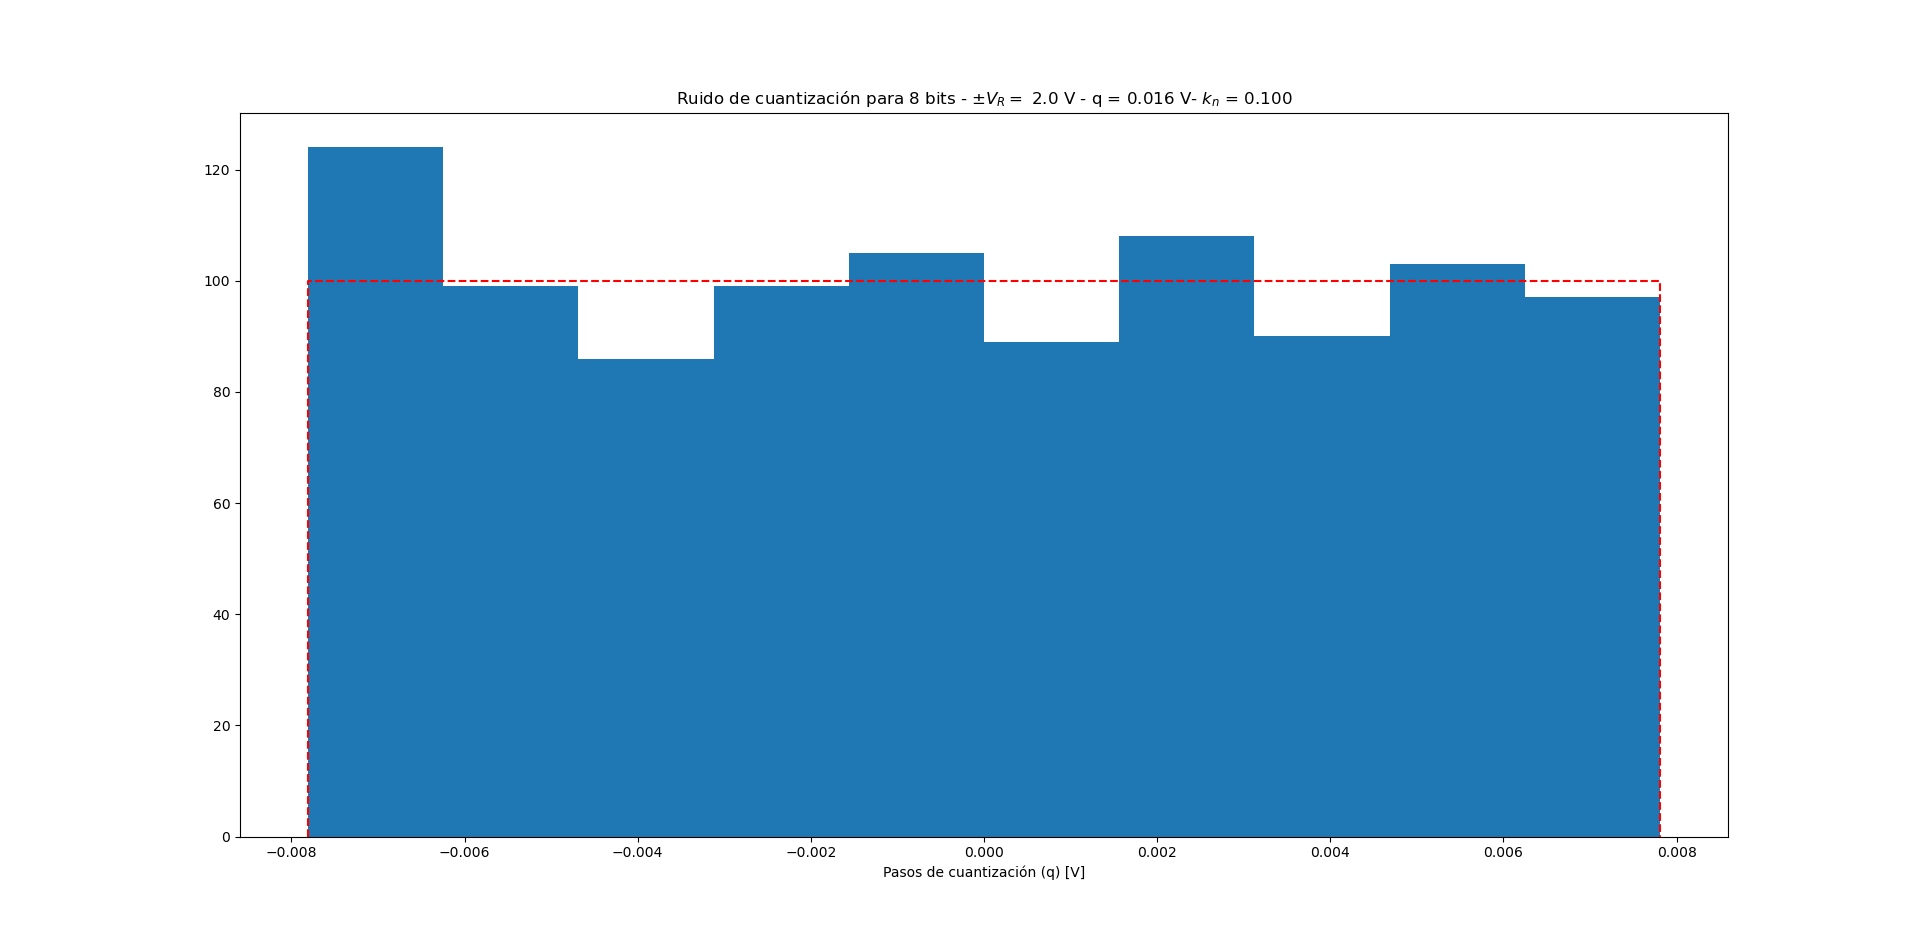

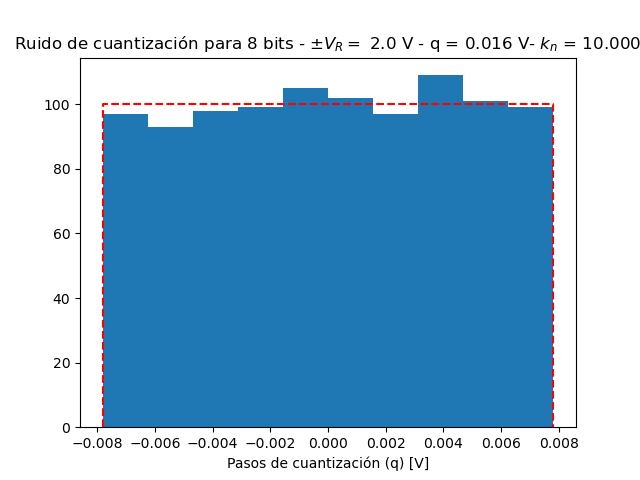

In [14]:
from IPython.display import Image, display

display(Image("Ruido_De_Cuantificacion_kn.png", width=1000))
display(Image("Ruido_De_Cuantificacion_10kn.png", width=1000))

Para el caso del histograma, opté por mostrar solo dos valores de $K_n=0,1$ y $K_n=10$, porque me parecieron que son los que aportan diferencias relevantes. Si bien el $K_n$ no está directamente relacionado con el paso de cuantización $q$, sí lo está con el nivel de ruido que tiene la señal analógica antes de ser cuantizada, recordar que $Pn = kn * Pq$.

En el caso de $K_n=0,1$, el ruido analógico es muchísimo menor que el digital, por lo tanto, lo que estamos viendo en el histograma es casi exclusivamente el ruido de cuantización. Como casi no hay ruido adicional que provoque la aleatoriedad de la señal antes de la cuantización, el ruido de cuantización aparece más estructurado, y no sigue una distribución perfectamente uniforme.

Por el contrario, con $K_n=10$, el ruido analógico es mayor al digital. Esto hace que el error de cuantización se comporte de manera más aleatoria y se aproxime a una distribución uniforme ideal. Por eso, el histograma en ese caso se ve mucho más cercano a las líneas rojas, que representan la caja teórica de esa distribución uniforme.

Este comportamiento esta relacionado con el hecho que el ruido de cuantización es incorrelado con la señal original, porque lo tomaremos así en esta cursada.

# Conclusión
Esta tarea me resultó muy útil para entender de forma más concreta cómo funciona el procesamiento de una señal mediante un ADC. Pude generar todos los gráficos solicitados y aportar un análisis en cada caso. En particular, el gráfico de "densidad espectral de potencia en función de la frecuencia" fue el que más me ayudó a visualizar el comportamiento del sistema. Fue una forma muy visual para entender cómo ingresa el ruido en la señal y cuál es el aporte tanto del ruido digital como del analógico luego del proceso de cuantización.

El análisis del ítem b me sirvio para pensar el cómo elegir los parámetros de diseño de un ADC para lograr un equilibrio entre el ruido de cuantización y el ruido analógico. La idea de mantener un piso de ruido bajo sin que ninguno de los dos ruidos predomine excesivamente me pareció especialmente útil, teniendo en cuenta que, si bien en teoría se puede mejorar indefinidamente tanto la electrónica digital como la analógica, en la práctica esas mejoras tienen un costo elevado. Encontrar ese punto de balance es fundamental para lograr un diseño eficiente.

Por último, no quiero dejar de mencionar que para el armado del informe me apoyé en herramientas de IA, tanto para mejorar la estética del notebook (por ejemplo, al escribir ecuaciones, subir varias imágenes o diseñar tablas), como también para aclarar conceptos que no terminaba de cerrar del todo. Un ejemplo es la relación entre $K_n$  y la forma del histograma; si bien recordaba que el ruido de cuantización se considera incorrelado y con distribución uniforme, no terminaba de tener del todo clara su relación con el nivel de ruido analógico, y me apoye en la inteligencia artificial para poder generar una idea.